# Defining Custom Display Logic for Your Own Objects

## Overview

In Python, objects can declare their textual representation using the `__repr__` method.  IPython expands on this idea and allows objects to declare other, richer representations including:

* HTML
* JSON
* PNG
* JPEG
* SVG
* LaTeX

This Notebook shows how you can add custom display logic to your own classes, so that they can be displayed using these rich representations. There are two ways of accomplishing this:

1. Implementing special display methods such as `_repr_html_`.
2. Registering a display function for a particular type.

In this Notebook we show how both approaches work.

Before we get started, we will import the various display functions for displaying the different formats we will create.

In [1]:
from IPython.display import display
from IPython.display import (
    display_html, display_jpeg, display_png,
    display_javascript, display_svg, display_latex
)

## Implementing special display methods

The main idea of the first approach is that you have to implement special display methods, one for each representation you want to use. Here is a list of the names of the special methods and the values they must return:

* `_repr_html_`: return raw HTML as a string
* `_repr_json_`: return raw JSON as a string
* `_repr_jpeg_`: return raw JPEG data
* `_repr_png_`: return raw PNG data
* `_repr_svg_`: return raw SVG data as a string
* `_repr_latex_`: return LaTeX commands in a string surrounded by "$".

### Model Citizen: pandas

A prominent example of a package that has IPython-aware rich representations of its objects is [pandas](http://pandas.pydata.org/).

A pandas DataFrame has a rich HTML table representation,
using `_repr_html_`.


In [2]:
import io
import pandas

In [3]:
%%writefile data.csv
Date,Open,High,Low,Close,Volume,Adj Close
2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


Overwriting data.csv


In [4]:
df = pandas.read_csv("data.csv")
pandas.set_option('display.notebook_repr_html', False)
df

         Date    Open    High     Low   Close    Volume  Adj Close
0  2012-06-01  569.16  590.00  548.50  584.00  14077000     581.50
1  2012-05-01  584.90  596.76  522.18  577.73  18827900     575.26
2  2012-04-02  601.83  644.00  555.00  583.98  28759100     581.48
3  2012-03-01  548.17  621.45  516.22  599.55  26486000     596.99
4  2012-02-01  458.41  547.61  453.98  542.44  22001000     540.12
5  2012-01-03  409.40  458.24  409.00  456.48  12949100     454.53

rich HTML can be activated via `pandas.set_option`.

In [5]:
pandas.set_option('display.notebook_repr_html', True)
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-06-01,569.16,590.00,548.50,584.00,14077000,581.50
1,2012-05-01,584.90,596.76,522.18,577.73,18827900,575.26
2,2012-04-02,601.83,644.00,555.00,583.98,28759100,581.48
3,2012-03-01,548.17,621.45,516.22,599.55,26486000,596.99
4,2012-02-01,458.41,547.61,453.98,542.44,22001000,540.12
5,2012-01-03,409.40,458.24,409.00,456.48,12949100,454.53


In [6]:
lines = df._repr_html_().splitlines()
print("\n".join(lines[:20]))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date</th>
      <th>Open</th>


### Exercise

Write a simple `Circle` Python class.  Don't even worry about properties such as radius, position, colors, etc. To help you out use the following representations (remember to wrap them in Python strings):

For HTML:

    &#x25CB;

For SVG:

    <svg width="100px" height="100px">
        <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="white"/>
    </svg>

For LaTeX (wrap with `$` and use a raw Python string):

    \bigcirc

After you write the class, create an instance and then use `display_html`, `display_svg` and `display_latex` to display those representations.

Tips : you can slightly tweek the representation to know from which `_repr_*_` method it came from. 
For example in my solution the svg representation is blue, and the HTML one show "`HTML`" between brackets.

### Solution

Here is my simple `MyCircle` class:

In [7]:
# %load ../../exercises/IPython Kernel/soln/mycircle.py
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        return "alert('I am a circle!');"


Now create an instance and use the display methods:

In [8]:
c = MyCircle()

In [9]:
display_html(c)

○ ( html )

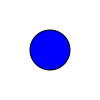

In [10]:
display_svg(c)

In [11]:
display_latex(c)

In [12]:
display_javascript(c)

## Adding IPython display support to existing objects

When you are directly writing your own classes, you can adapt them for display in IPython by following the above example.  But in practice, we often need to work with existing code we can't modify.  We now illustrate how to add these kinds of extended display capabilities to existing objects. To continue with our example above, we will add a PNG representation to our `Circle` class using Matplotlib.

### Model citizen: sympy

[SymPy](http://sympy.org) is another model citizen that defines rich representations of its object.
Unlike pandas above, sympy registers display formatters via IPython's display formatter API, rather than declaring `_repr_mime_` methods.

In [13]:
from sympy import Rational, pi, exp, I, symbols
x, y, z = symbols("x y z")

In [14]:
r = Rational(3,2)*pi + exp(I*x) / (x**2 + y)
r

3*pi/2 + exp(I*x)/(x**2 + y)

SymPy provides an `init_printing` function that sets up advanced $\LaTeX$
representations of its objects.

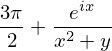

In [15]:
from sympy.interactive.printing import init_printing
init_printing()
r

To add a display method to an existing class, we must use IPython's display formatter API.  Here we show all of the available formatters:

In [16]:
ip = get_ipython()
for mime, formatter in ip.display_formatter.formatters.items():
    print('%24s : %s' % (mime, formatter.__class__.__name__))


              text/plain : PlainTextFormatter
               text/html : HTMLFormatter
           text/markdown : MarkdownFormatter
           image/svg+xml : SVGFormatter
               image/png : PNGFormatter
         application/pdf : PDFFormatter
              image/jpeg : JPEGFormatter
              text/latex : LatexFormatter
        application/json : JSONFormatter
  application/javascript : JavascriptFormatter


Let's grab the PNG formatter:

In [17]:
png_f = ip.display_formatter.formatters['image/png']

We will use the `for_type` method to register our display function.

In [18]:
png_f.for_type?

Signature: png_f.for_type(typ, func=None)
Docstring:
Add a format function for a given type.

Parameters
-----------
typ : type or '__module__.__name__' string for a type
    The class of the object that will be formatted using `func`.
func : callable
    A callable for computing the format data.
    `func` will be called with the object to be formatted,
    and will return the raw data in this formatter's format.
    Subclasses may use a different call signature for the
    `func` argument.
    
    If `func` is None or not specified, there will be no change,
    only returning the current value.

Returns
-------
oldfunc : callable
    The currently registered callable.
    If you are registering a new formatter,
    this will be the previous value (to enable restoring later).
File:      /usr/local/software/jureca/Stages/Devel-2019a/software/Jupyter/2019a-rc31-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/IPython/core/formatters.py
Type:      method


As the docstring describes, we need to define a function the takes the object as a parameter and returns the raw PNG data.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
class AnotherCircle(object):
    def __init__(self, radius=1, center=(0,0), color='r'):
        self.radius = radius
        self.center = center
        self.color = color
    
    def __repr__(self):
        return "<%s Circle with r=%s at %s>" % (
                    self.color,
                    self.radius,
                    self.center,
                )
    
c = AnotherCircle()
c

<r Circle with r=1 at (0, 0)>

In [21]:
from IPython.core.pylabtools import print_figure

def png_circle(circle):
    """Render AnotherCircle to png data using matplotlib"""
    fig, ax = plt.subplots()
    patch = plt.Circle(circle.center,
                       radius=circle.radius,
                       fc=circle.color,
                       )
    ax.add_patch(patch)
    plt.axis('scaled')
    data = print_figure(fig, 'png')
    # We MUST close the figure, otherwise IPython's display machinery
    # will pick it up and send it as output, resulting in a double display
    plt.close(fig)
    return data

In [22]:
c = AnotherCircle()
print(repr(png_circle(c)[:10]))

b'\x89PNG\r\n\x1a\n\x00\x00'


Now we register the display function for the type:

In [23]:
png_f.for_type(AnotherCircle, png_circle)

Now all `Circle` instances have PNG representations!

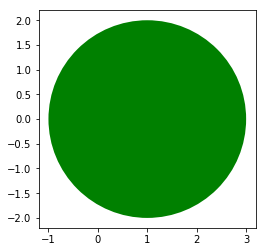

In [24]:
c2 = AnotherCircle(radius=2, center=(1,0), color='g')
c2

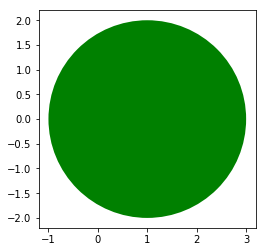

In [25]:
display_png(c2)

## return the object

In [26]:
# for demonstration purpose, I do the same with a circle that has no _repr_javascript method
class MyNoJSCircle(MyCircle):
    
    def _repr_javascript_(self):
        return

cNoJS = MyNoJSCircle()

Of course you can now still return the object, and this will use compute all the representations, store them in the notebook and show you the appropriate one.

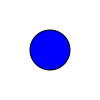

In [27]:
cNoJS

Or just use `display(object)` if you are in a middle of a loop

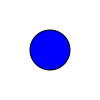

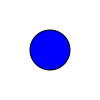

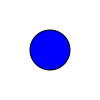

In [28]:
for i in range(3):
    display(cNoJS)

Advantage of using `display()` versus `display_*()` is that all representation will be stored in the notebook document and notebook file, they are then availlable for other frontends or post-processing tool like `nbconvert`.

Let's compare `display()` vs `display_html()` for our circle in the Notebook Web-app and we'll see later the difference in nbconvert.

In [29]:
print("I should see a nice html circle in web-app, but")
print("nothing if the format I'm viewing the notebook in")
print("does not support html")
display_html(cNoJS)

I should see a nice html circle in web-app, but
nothing if the format I'm viewing the notebook in
does not support html


○ ( html )

Whatever the format I will see a representation
of my circle


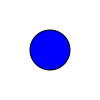

In [30]:
print("Whatever the format I will see a representation")
print("of my circle")
display(cNoJS)

Same if I return the object


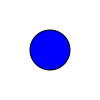

In [31]:
print("Same if I return the object")
cNoJS

In [32]:
print("But not if I print it")
print(cNoJS)

But not if I print it


## Cleanup

In [33]:
!rm -f data.csv